In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import sys
import os
import seaborn as sns

In [2]:
# Setup paths
ROOT_DIR = Path().resolve().parents[1]
DATA_R_DIR = ROOT_DIR / 'data' / 'data_raw'
DATA_DIR = ROOT_DIR / 'data'

In [3]:
os.chdir(ROOT_DIR)
print(ROOT_DIR)
from pipeline.extract import read_four_contaminants
from pipeline.tidy import tidy_raw_contaminant_data
from pipeline.transform import subset_sensors
os.chdir('..')
print(os.getcwd())


/home/nick/bachelor-project/forecasting_smog_DL_GNN/src

Running __init__.py for data pipeline...
Pipeline initialized

/home/nick/bachelor-project/forecasting_smog_DL_GNN


In [4]:
import matplotlib.dates as mdates

def change_contaminant_date_format(df: pd.DataFrame) -> pd.DataFrame:
    """
    Changes the date format to yyyy-mm-dd hh:mm, while doing some
    type checks. The column entries are converted to datetime objects
    and the column name is changed to 'DateTime' (and will later be used
    as the timeseries index).

    :param df: DataFrame
    :return: DataFrame with datetime column
    """
    try:
        df["Begindatumtijd"] = pd.to_datetime(
            df["Begindatumtijd"], format="%Y%m%d %H:%M"
        )
    except ValueError:
        df["Begindatumtijd"] = pd.to_datetime(df["Begindatumtijd"], format="ISO8601")
    df.rename(columns={"Begindatumtijd": "DateTime"}, inplace=True)
    return df

# Load in raw data

In [5]:
def process_contaminants(year, component):
    dfs = []

    for year in YEARS:
        df = read_four_contaminants(year=year, contaminants=[COMPONENT])
        df = df[0].rename(columns={' Begindatumtijd': 'Begindatumtijd'})
        df = change_contaminant_date_format(df)
        dfs.append(df)
    return dfs

In [6]:
def plot_timeseries(dfs, COMPONENT, STN, YEARS):
    for idx in range(len(YEARS)):
        # Calculate rolling mean and store it
        rolling_mean = dfs[idx][STN].rolling(window=24).mean()
        
        # Create figure for comparison
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))
        
        # Plot original data
        ax1.plot(dfs[idx]['DateTime'], dfs[idx][STN], label='Original')
        ax1.set_title(f'{COMPONENT} {YEARS[idx]} {STN} - Original')
        ax1.grid(True, alpha=0.3)
        ax1.legend()
        
        # Plot rolling mean
        ax2.plot(dfs[idx]['DateTime'], rolling_mean, label='24-hour Rolling Mean', color='red')
        ax2.set_title(f'{COMPONENT} {YEARS[idx]} {STN} - 24-hour Rolling Mean')
        ax2.grid(True, alpha=0.3)
        ax2.legend()
        
        # Format both axes
        for ax in [ax1, ax2]:
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
            ax.xaxis.set_major_locator(mdates.AutoDateLocator())
            plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
        
        plt.tight_layout()
    plt.show()

# Amsterdam Stations

In [7]:
# AMS stations
VONDELPARK = 'NL49014'
VANDIEMEN = 'NL49012'
NIEUWEN = 'NL49003'

# ROTTERDAM stations
SCHIEDAMSEVEST = 'NL10418'
STATENWEG = 'NL01493'
SCHIEDAMA = 'NL01494'
HOOGVLIET = 'NL01485'


YEARS = [2017,2018,2020,2021,2022,2023]
STN = STATENWEG
COMPONENT = "NO2"

## Amsterdam-Nieuwendammerdijk


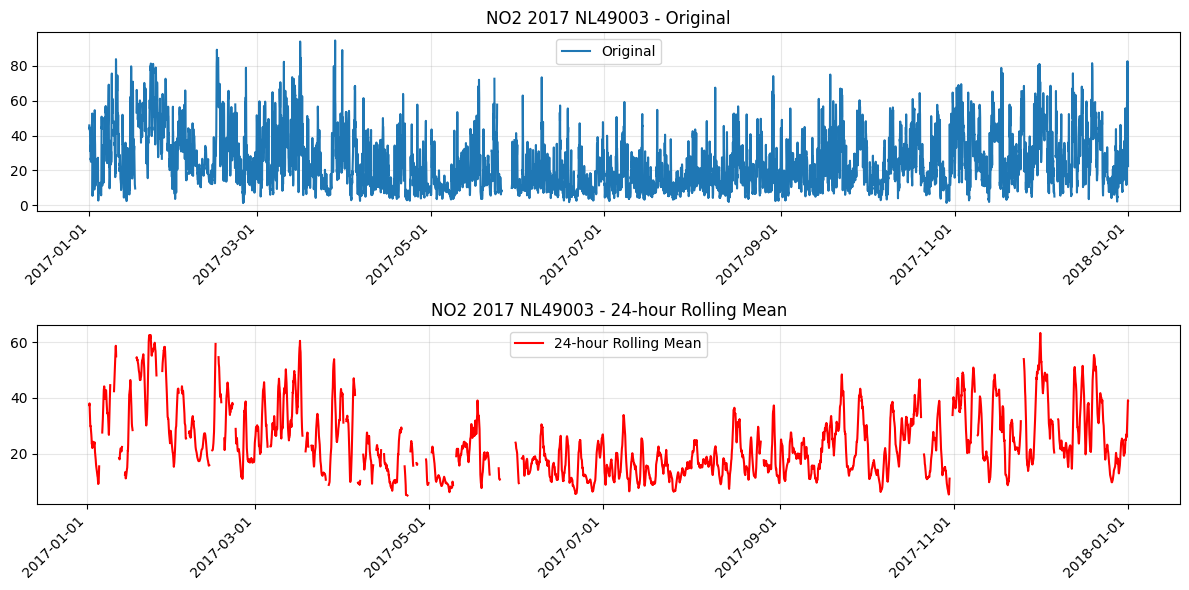

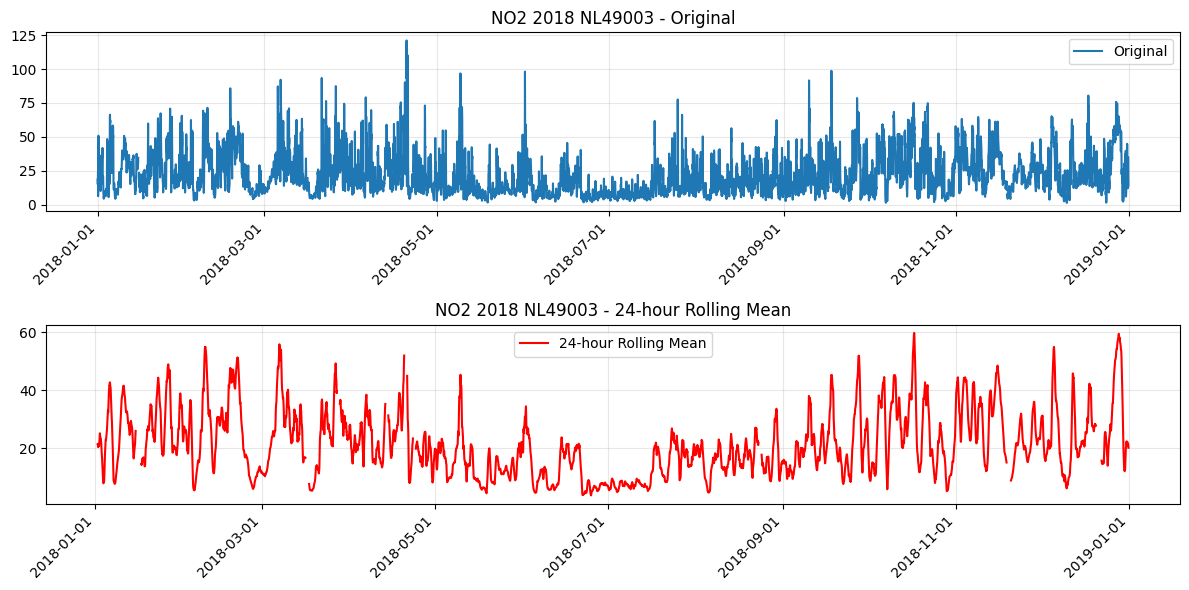

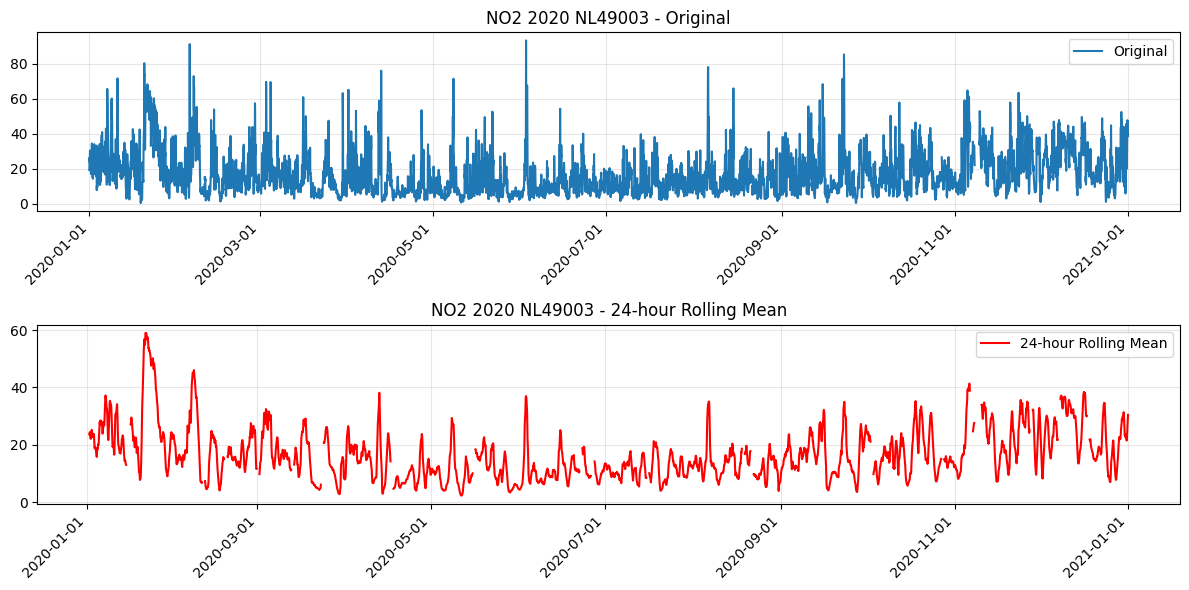

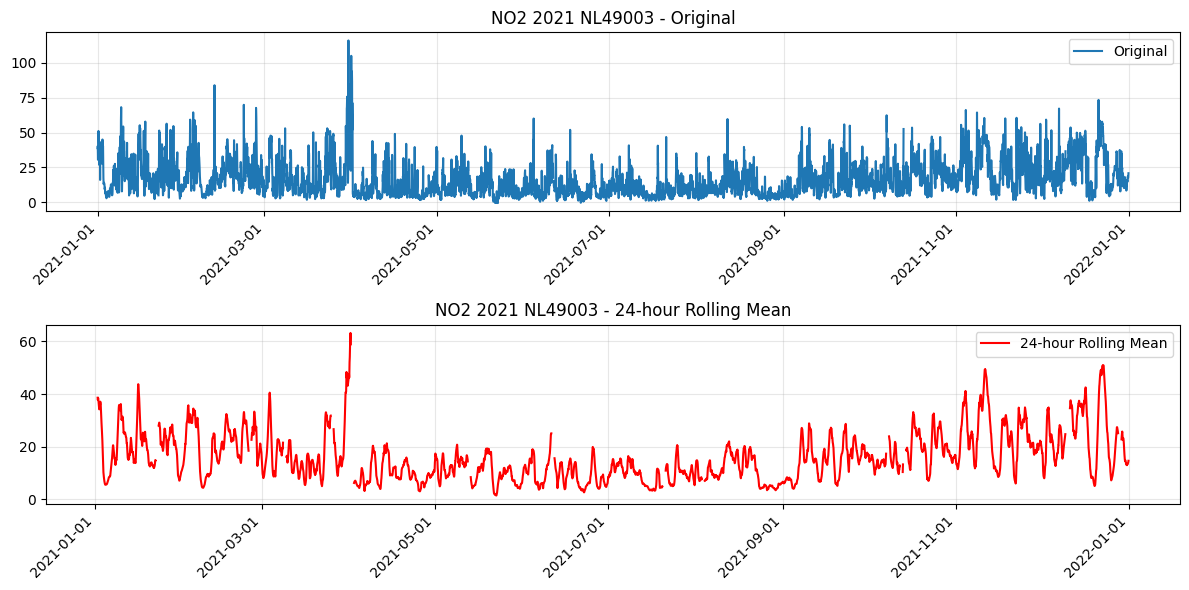

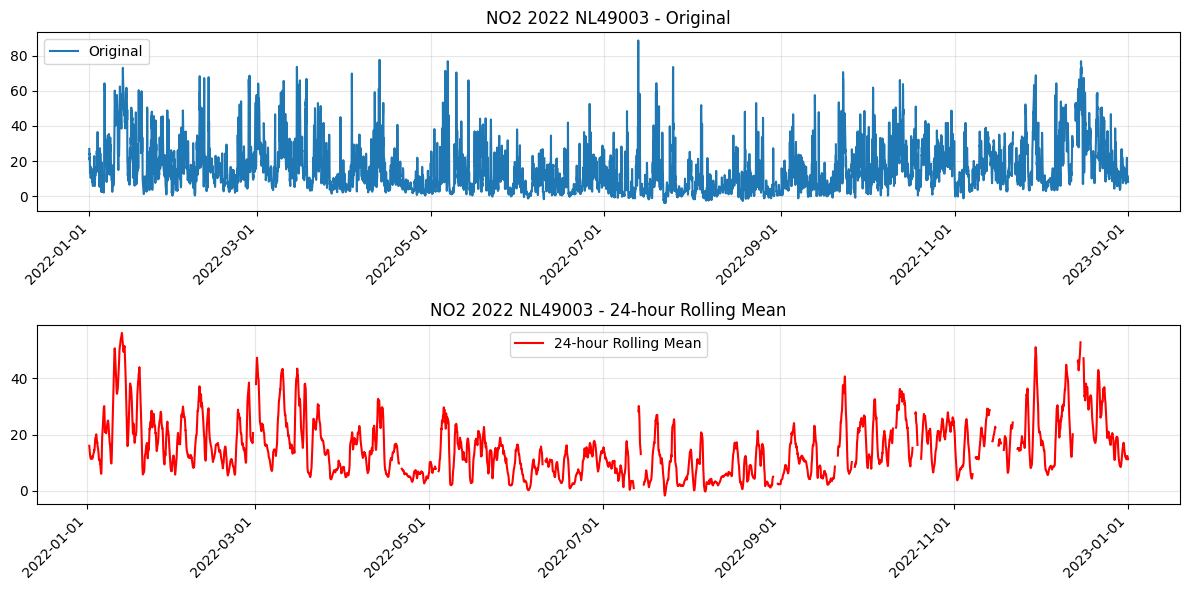

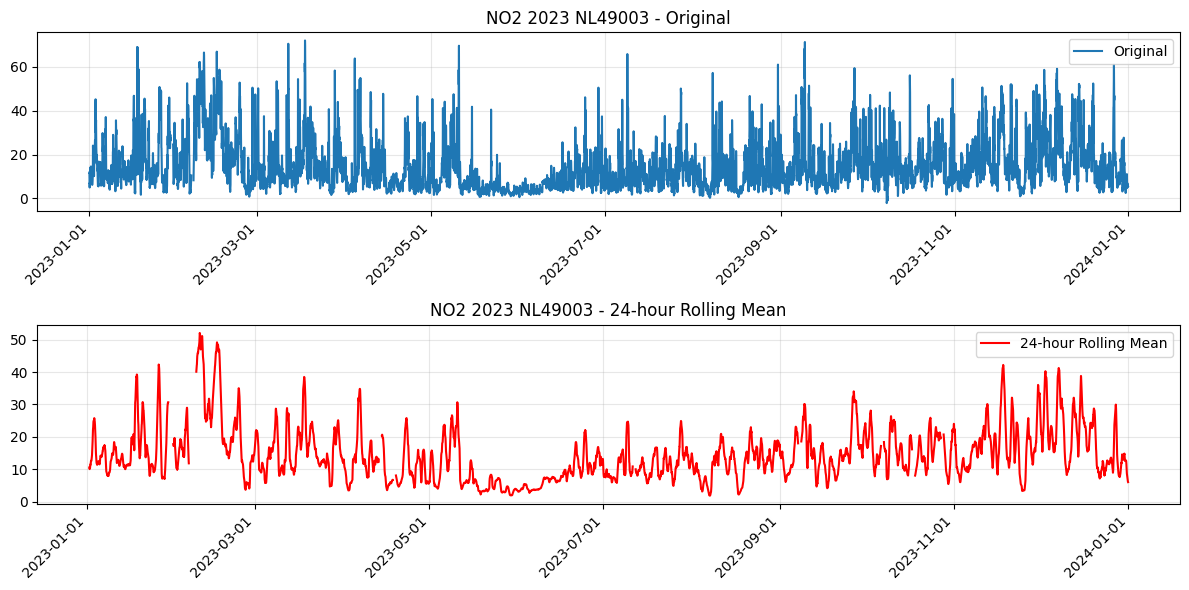

In [8]:
STN = NIEUWEN
plot_timeseries(process_contaminants(YEARS, COMPONENT), COMPONENT, STN, YEARS)

## Vondelpark

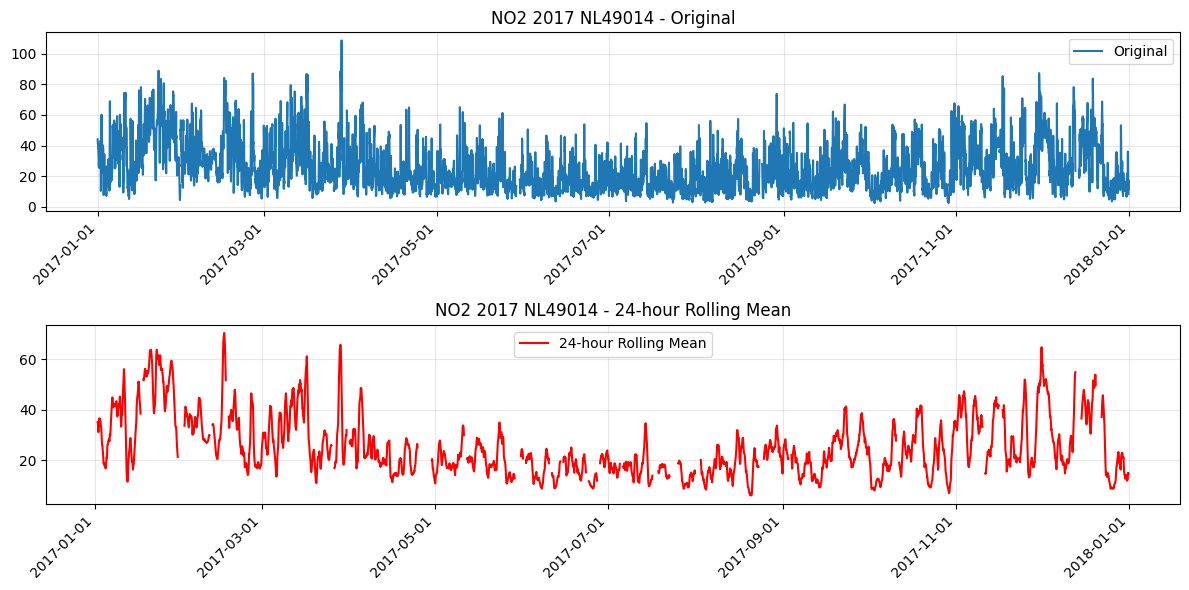

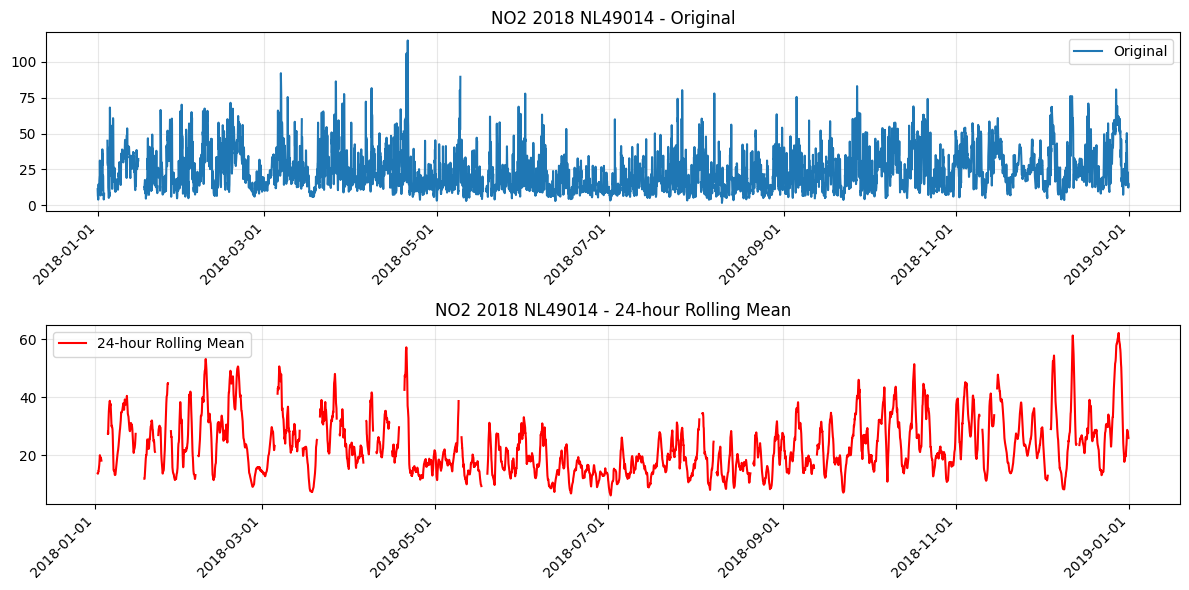

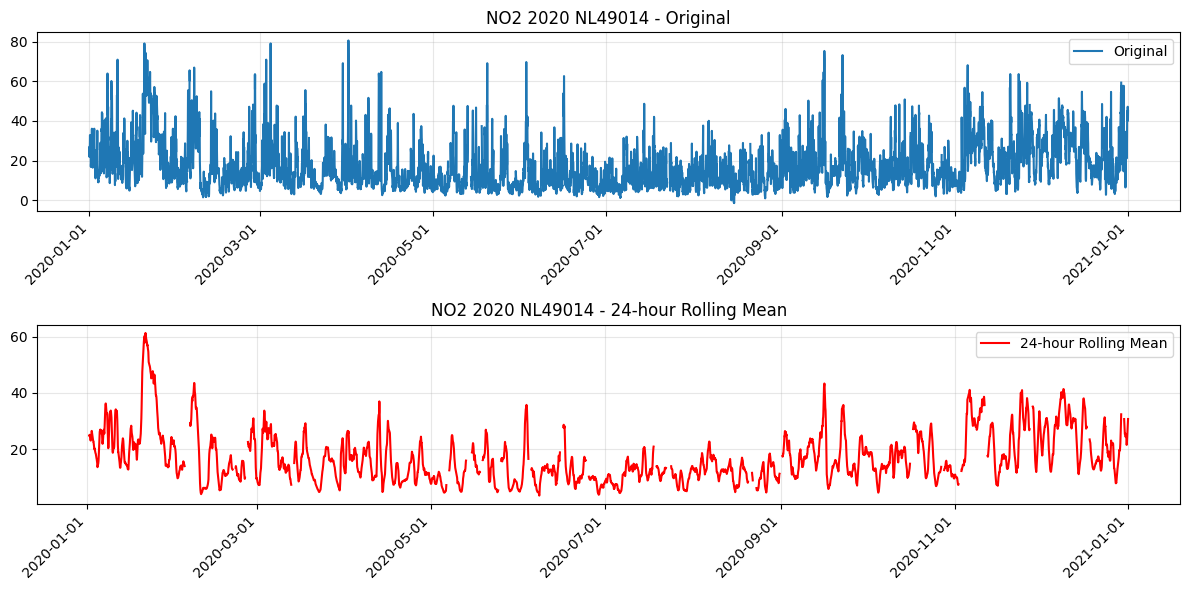

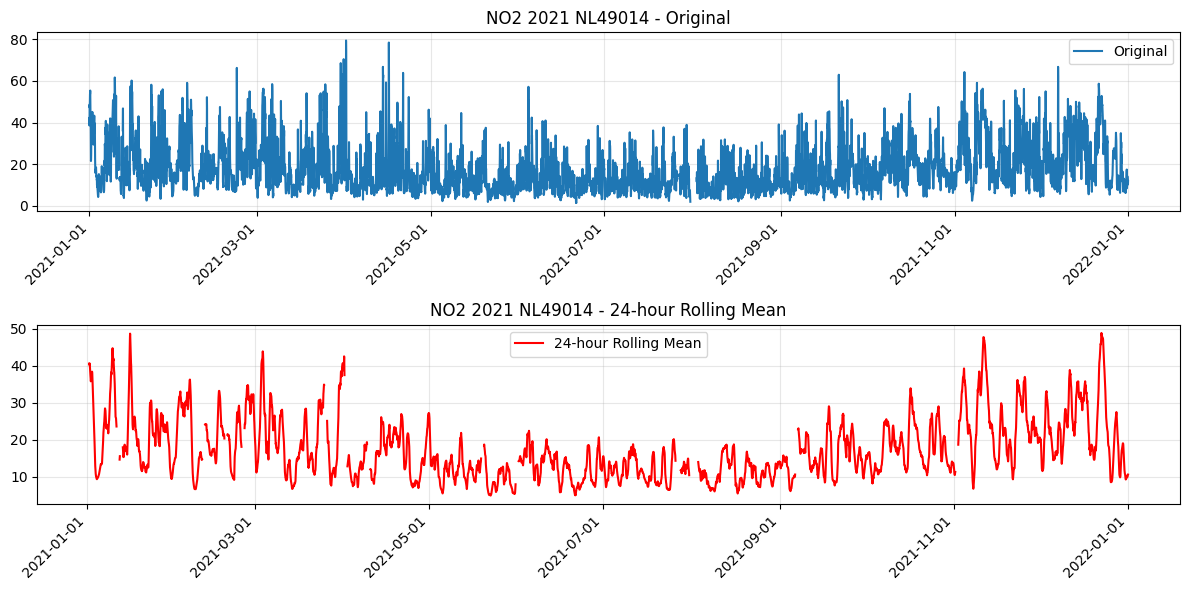

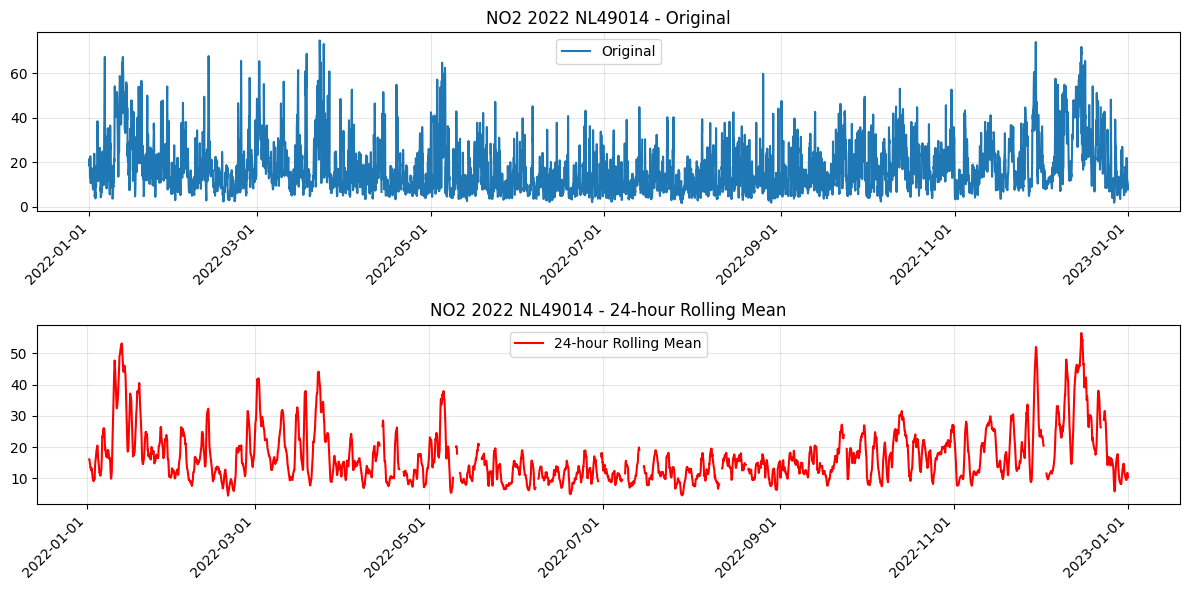

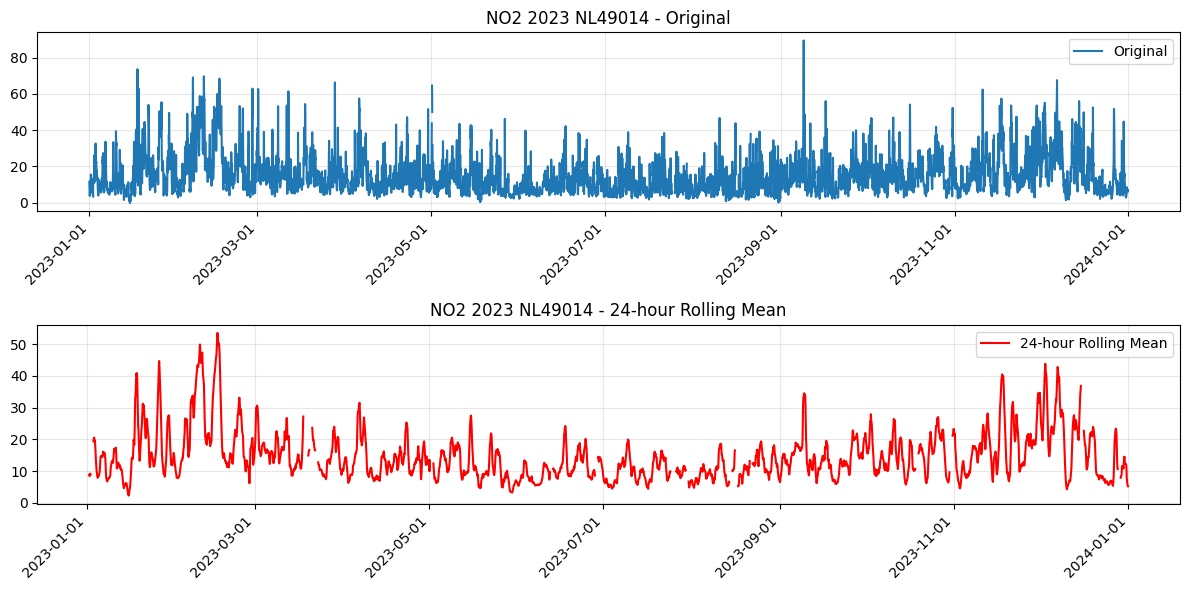

In [9]:
STN = VONDELPARK
plot_timeseries(process_contaminants(YEARS, COMPONENT), COMPONENT, STN, YEARS)

## Van Diemenstraat Station

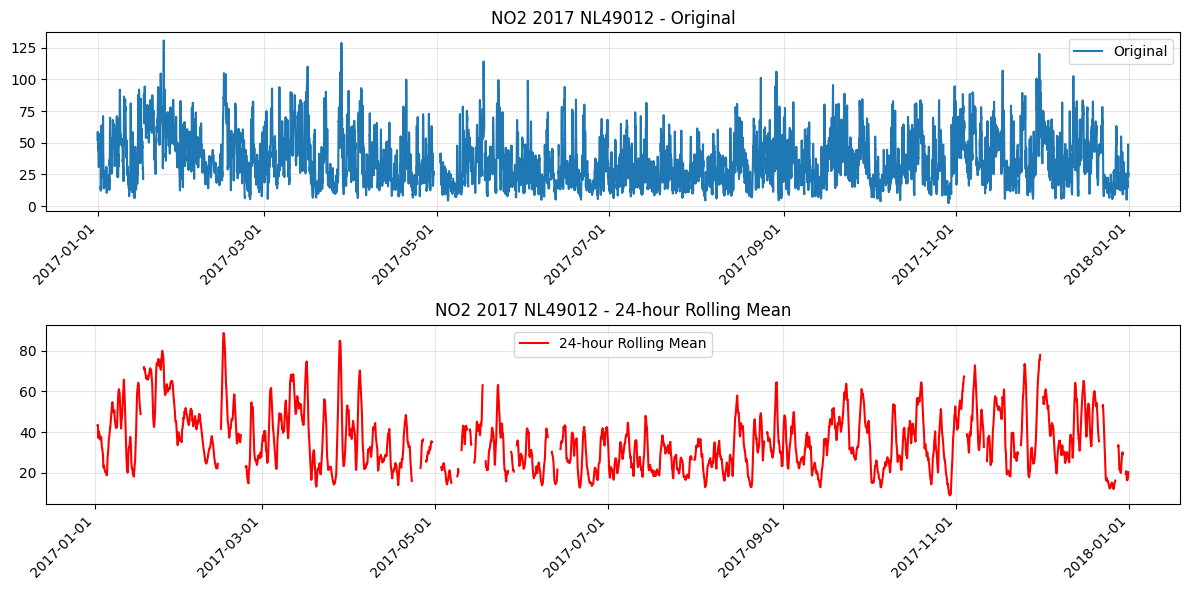

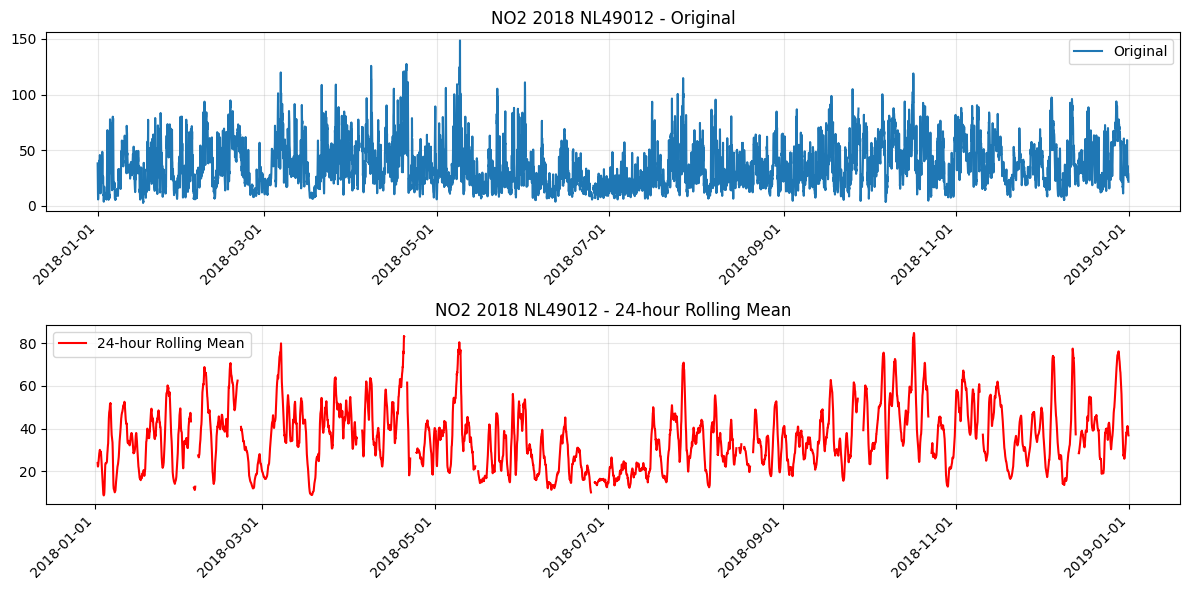

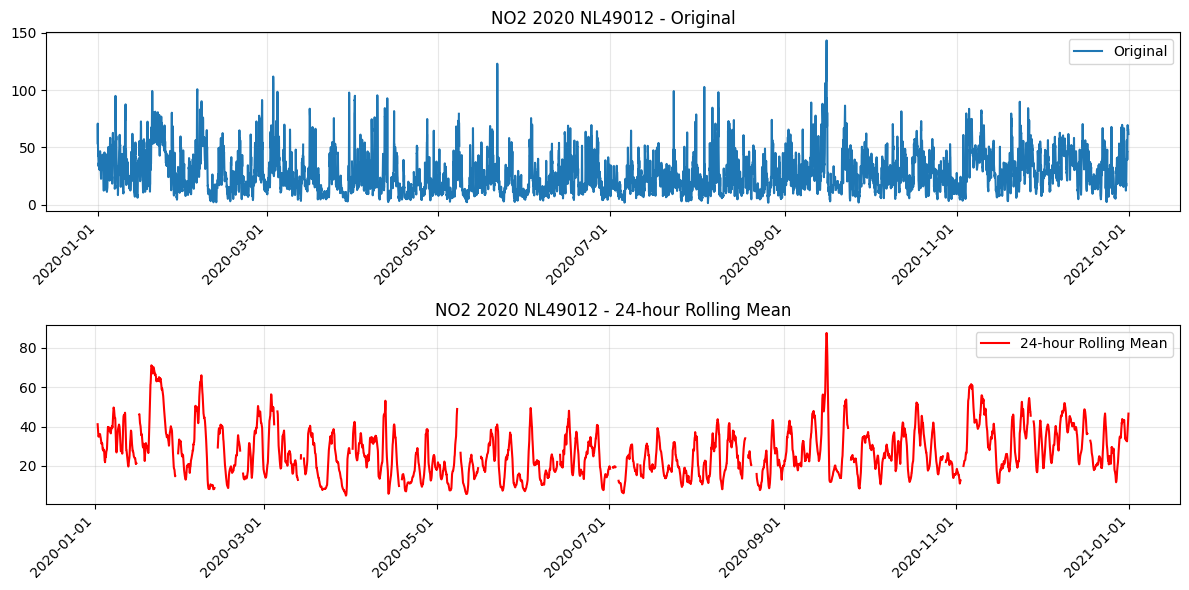

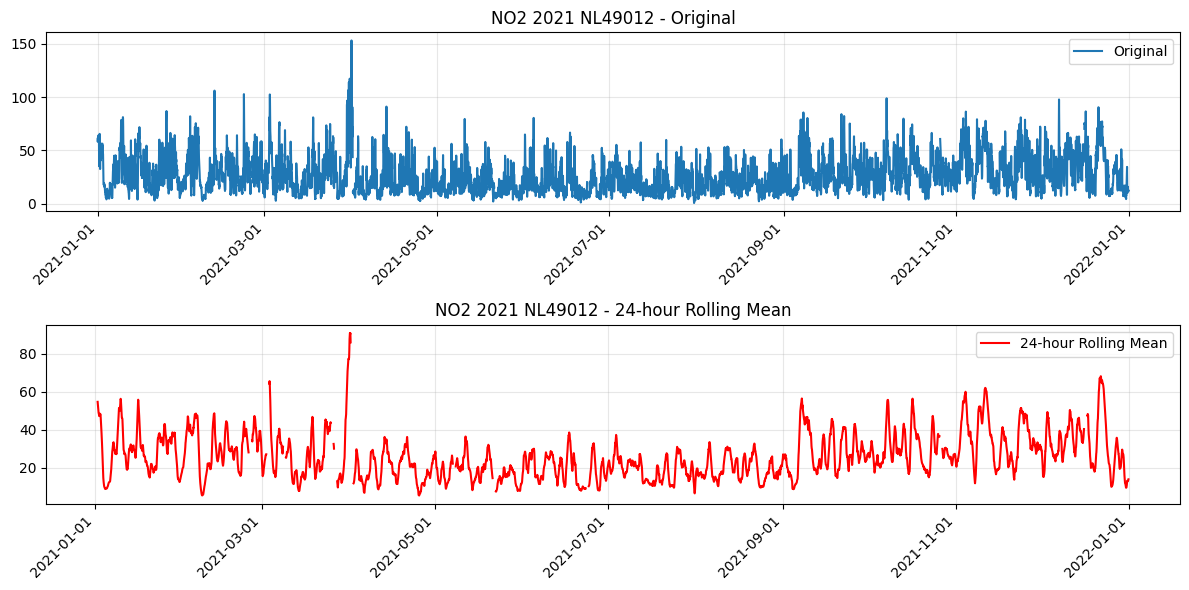

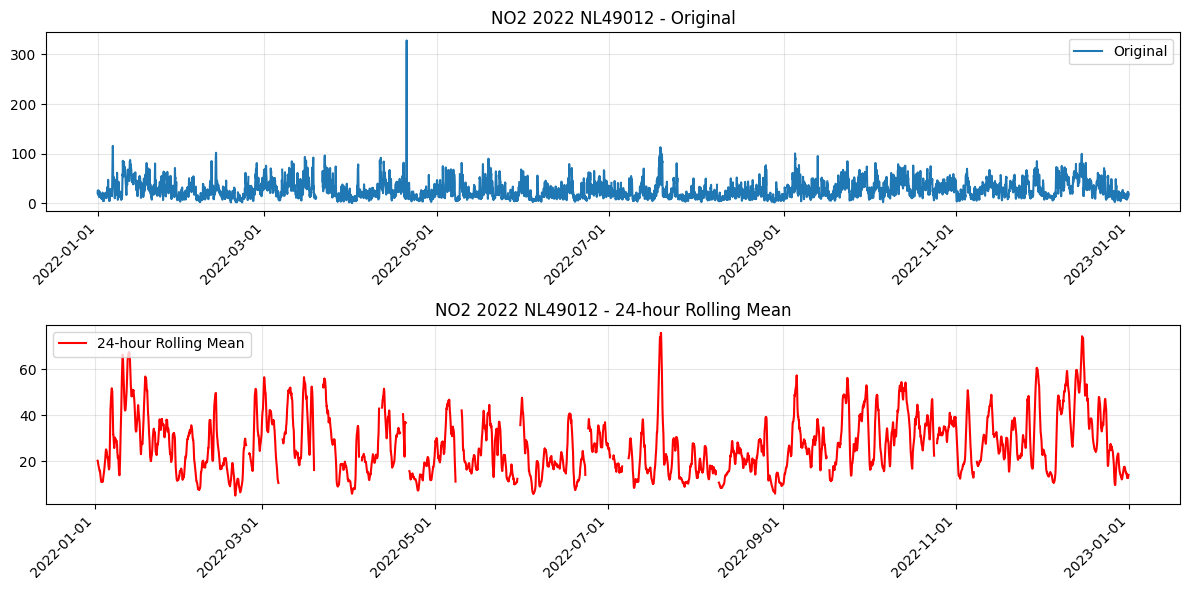

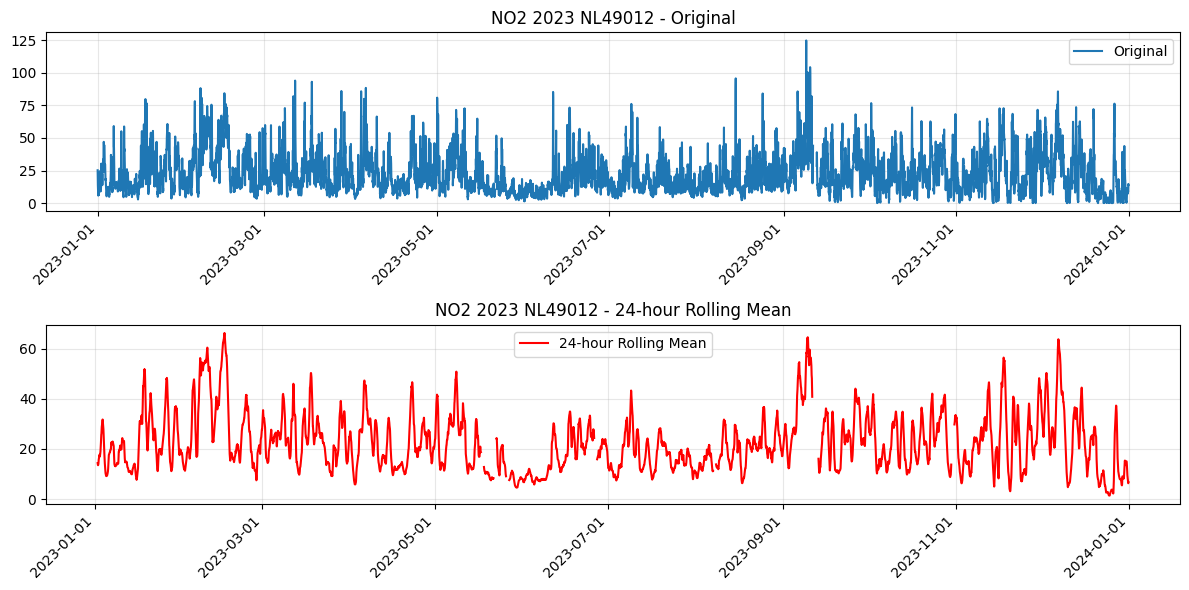

In [10]:
STN = VANDIEMEN
plot_timeseries(process_contaminants(YEARS, COMPONENT), COMPONENT, STN, YEARS)

# Rotterdam

## Schiedamsevest Station

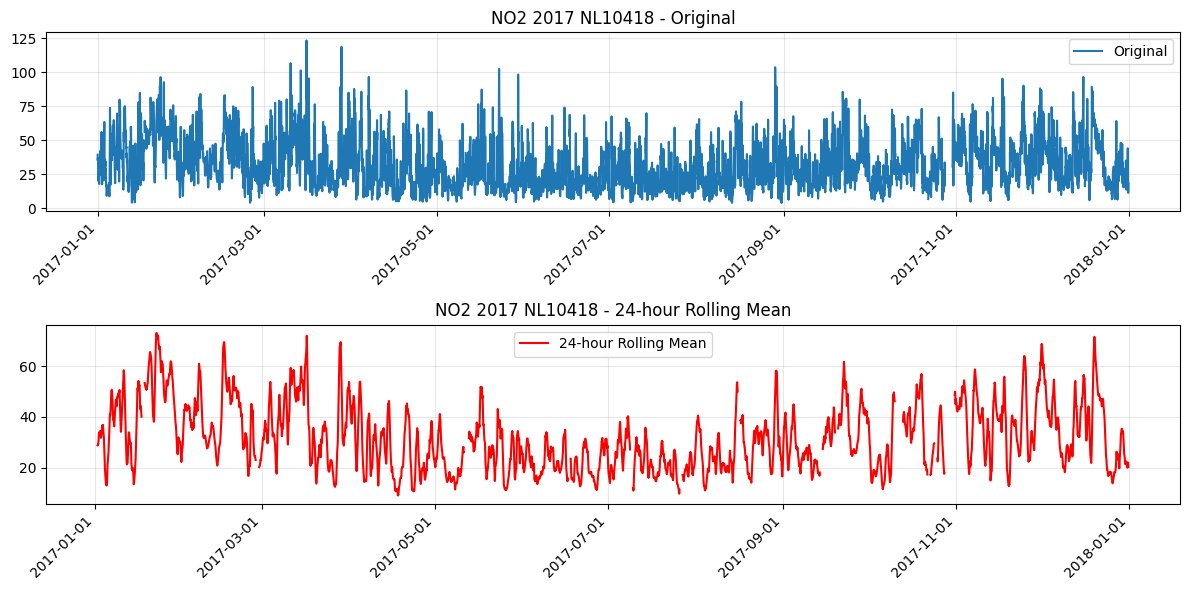

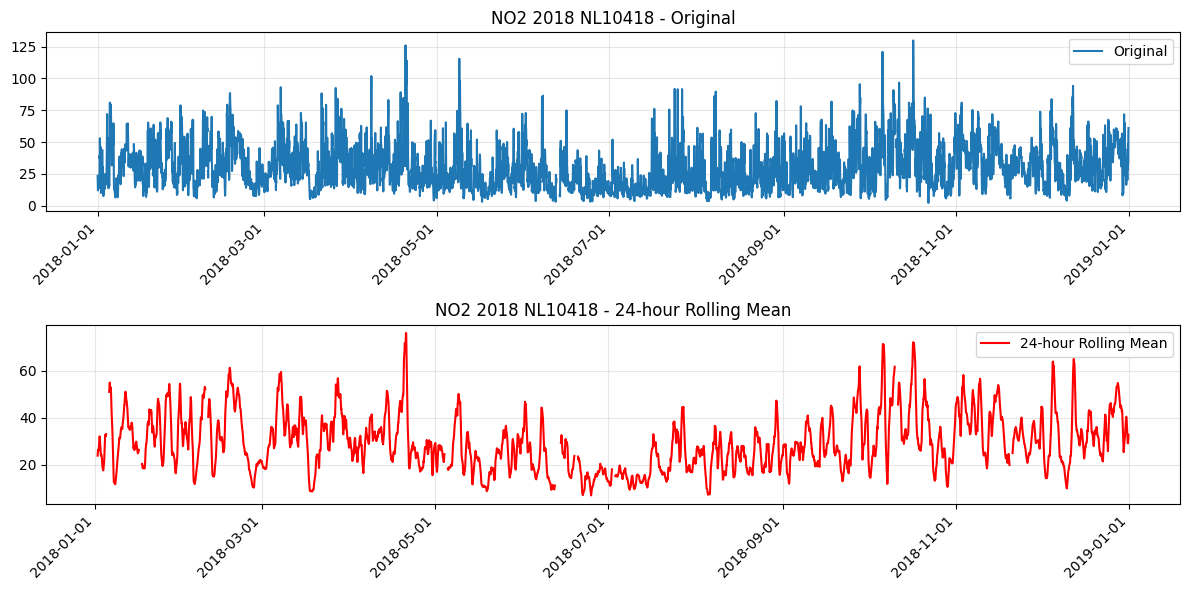

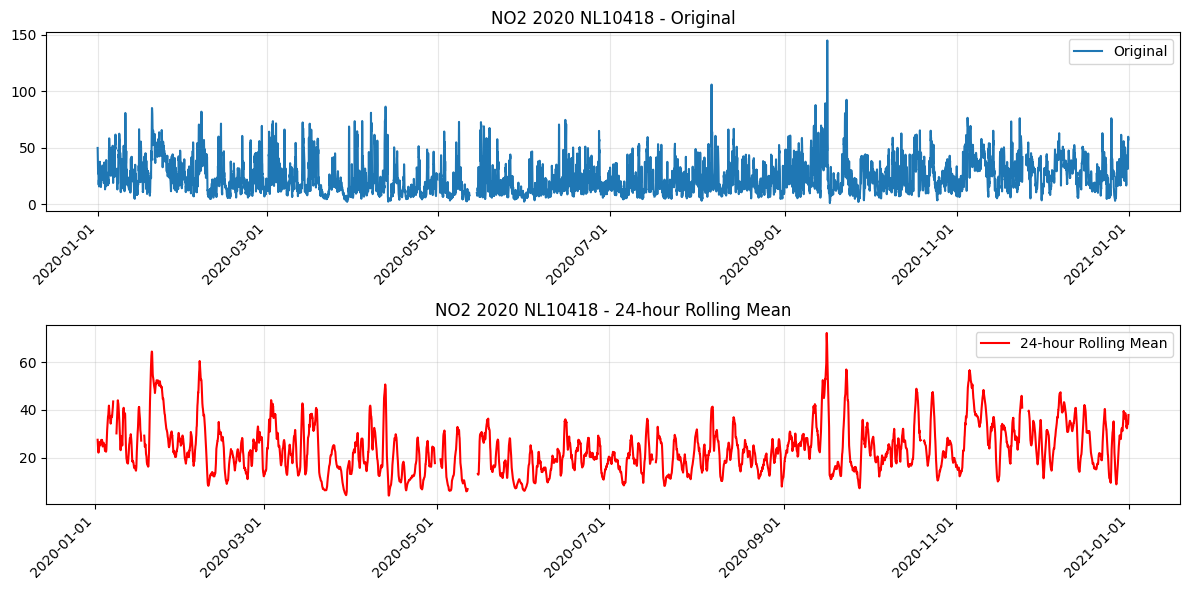

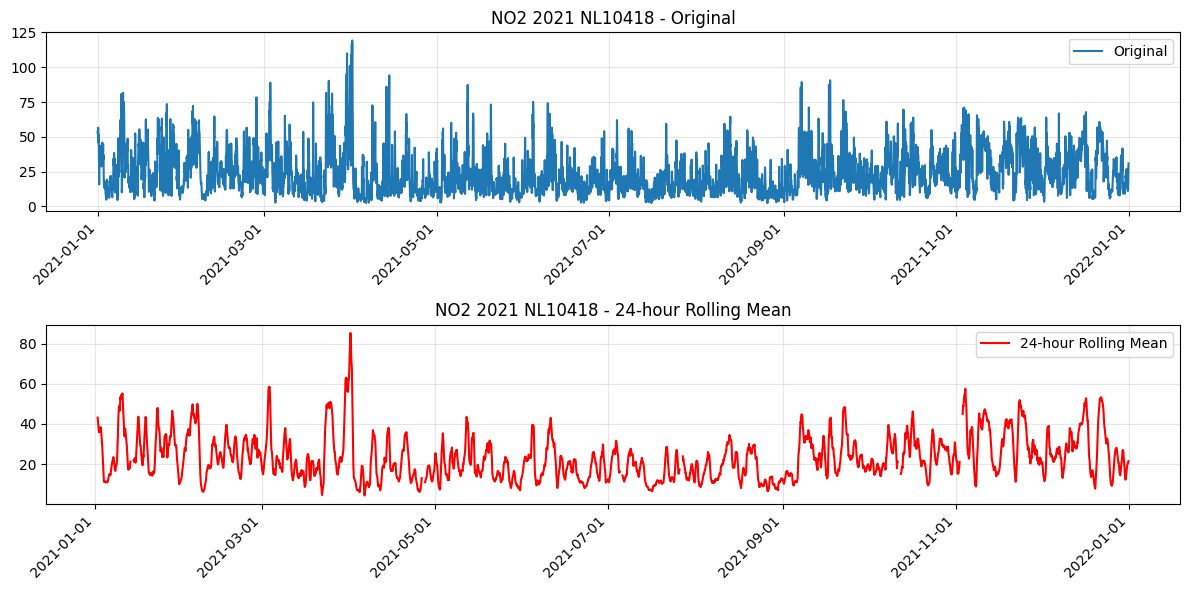

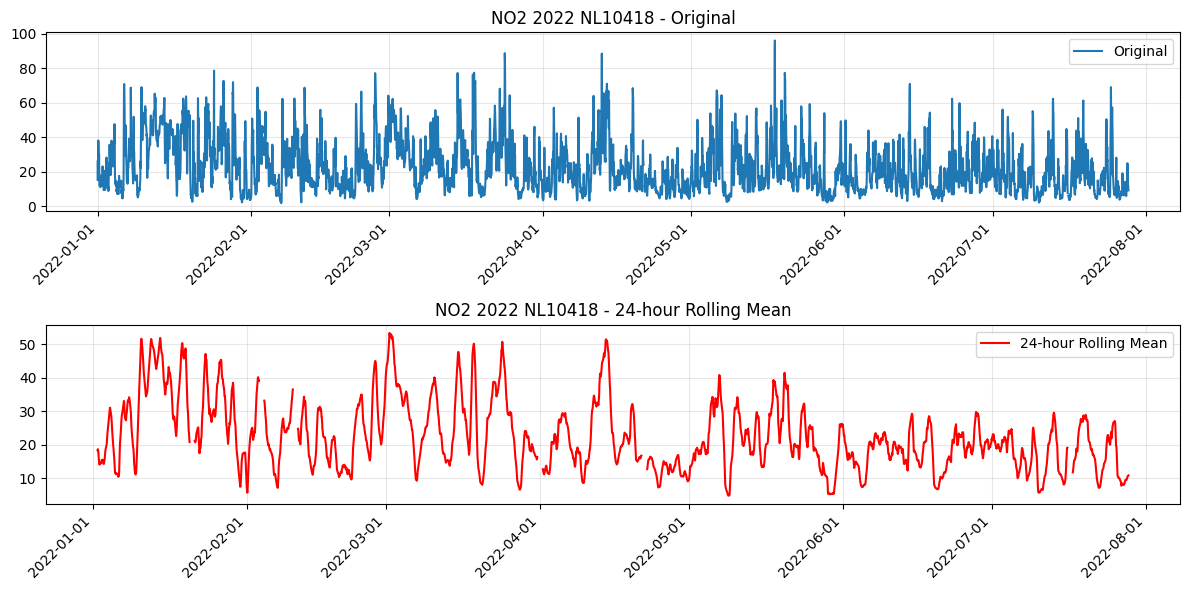

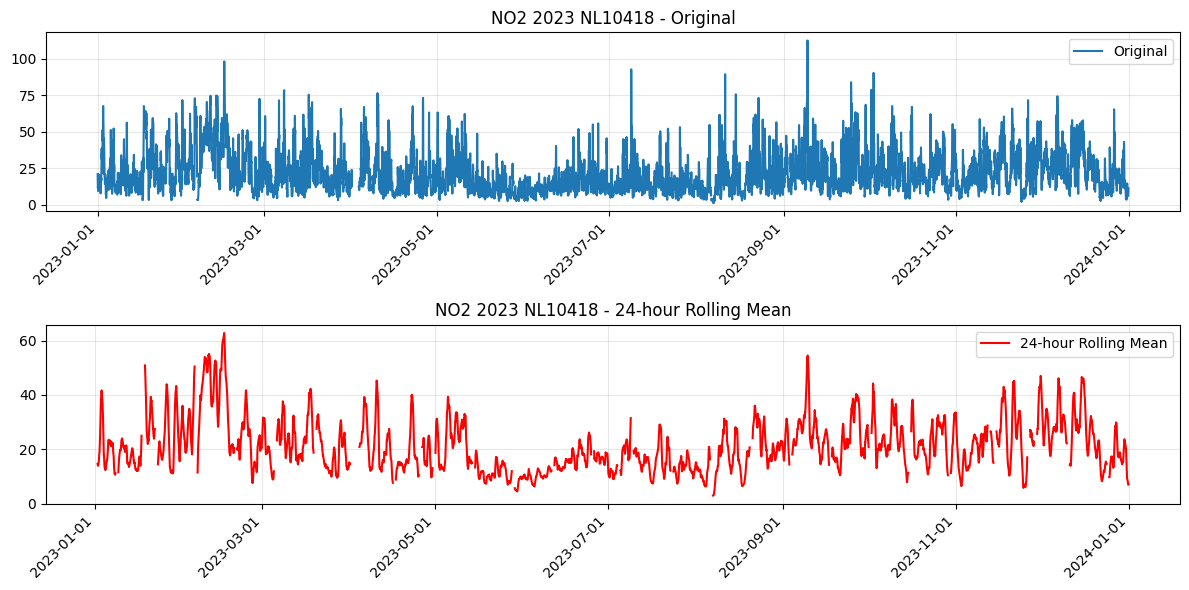

In [11]:
STN = SCHIEDAMSEVEST
plot_timeseries(process_contaminants(YEARS, COMPONENT), COMPONENT, STN, YEARS)

## Schiedam-A.Arienstraat


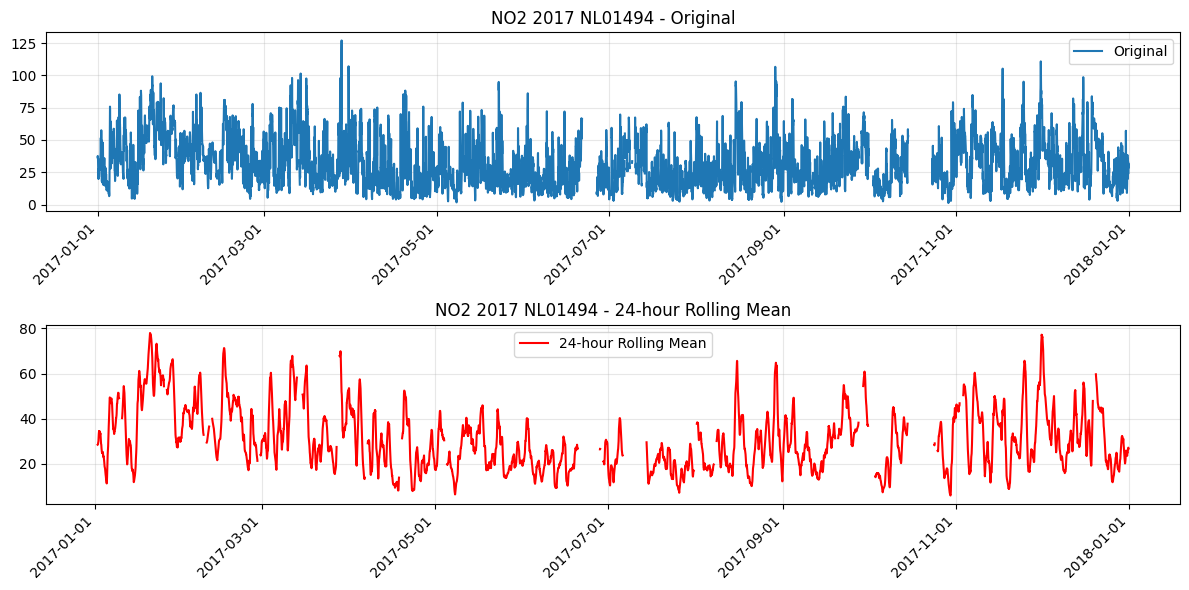

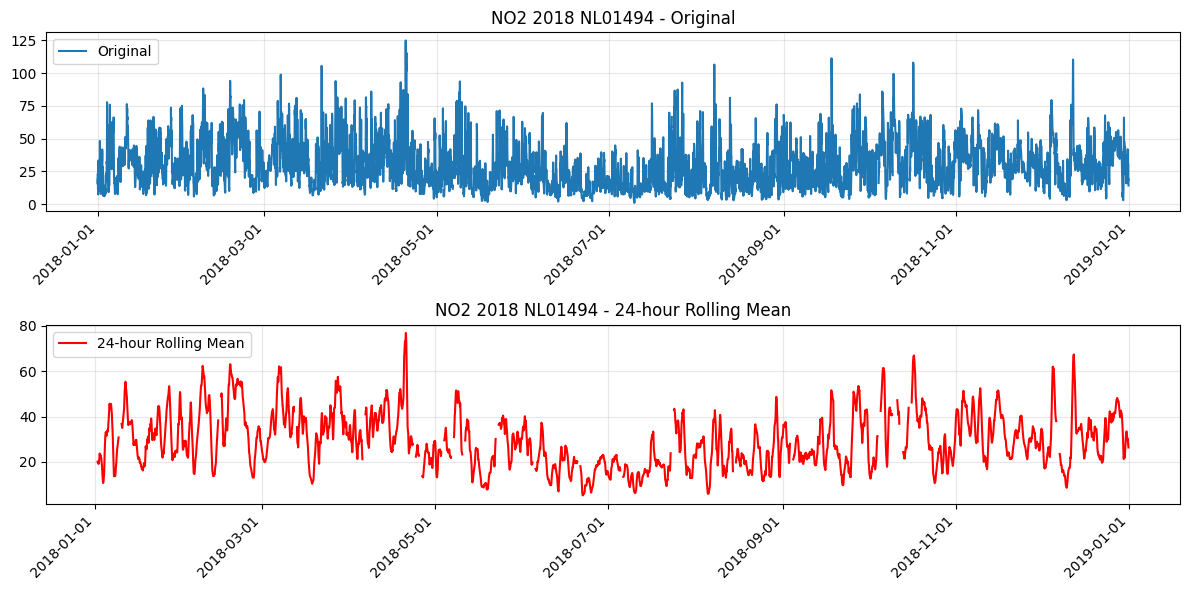

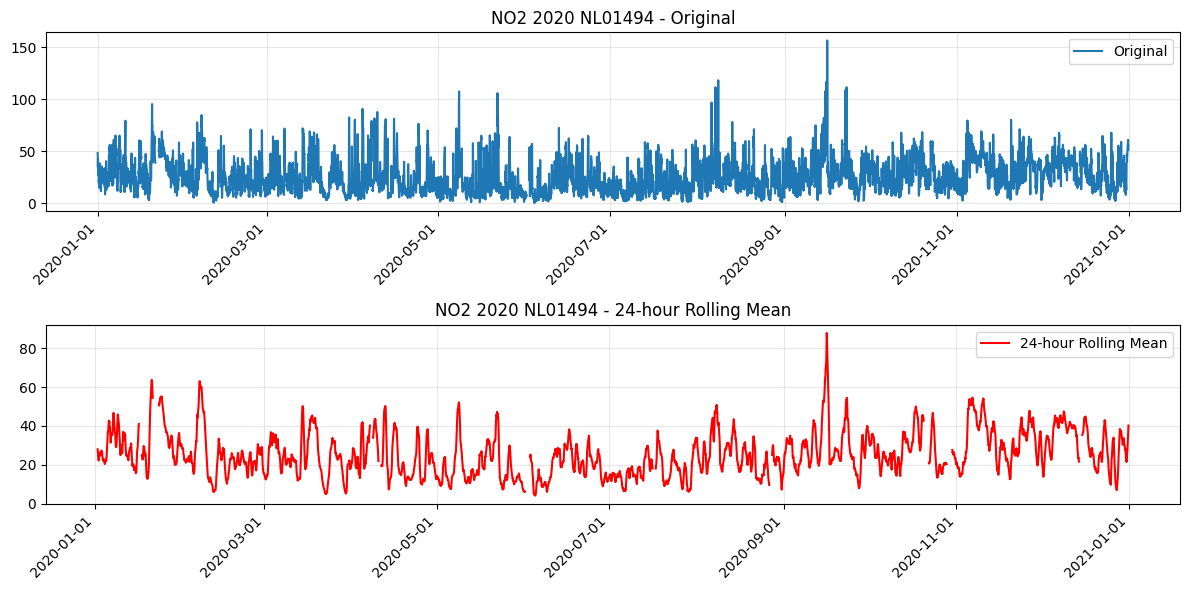

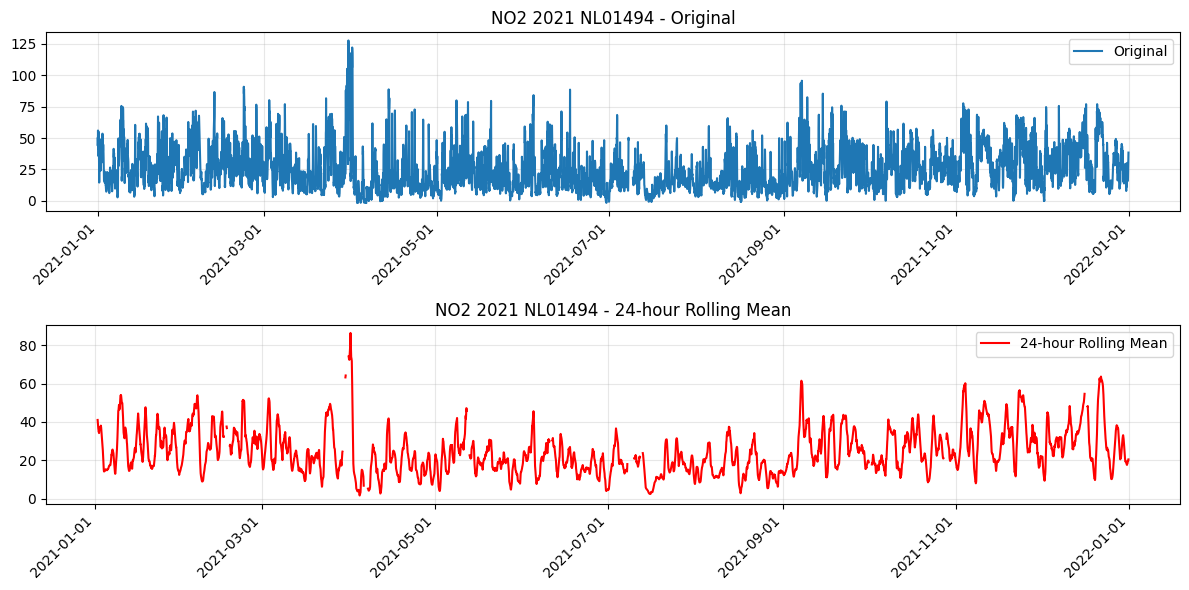

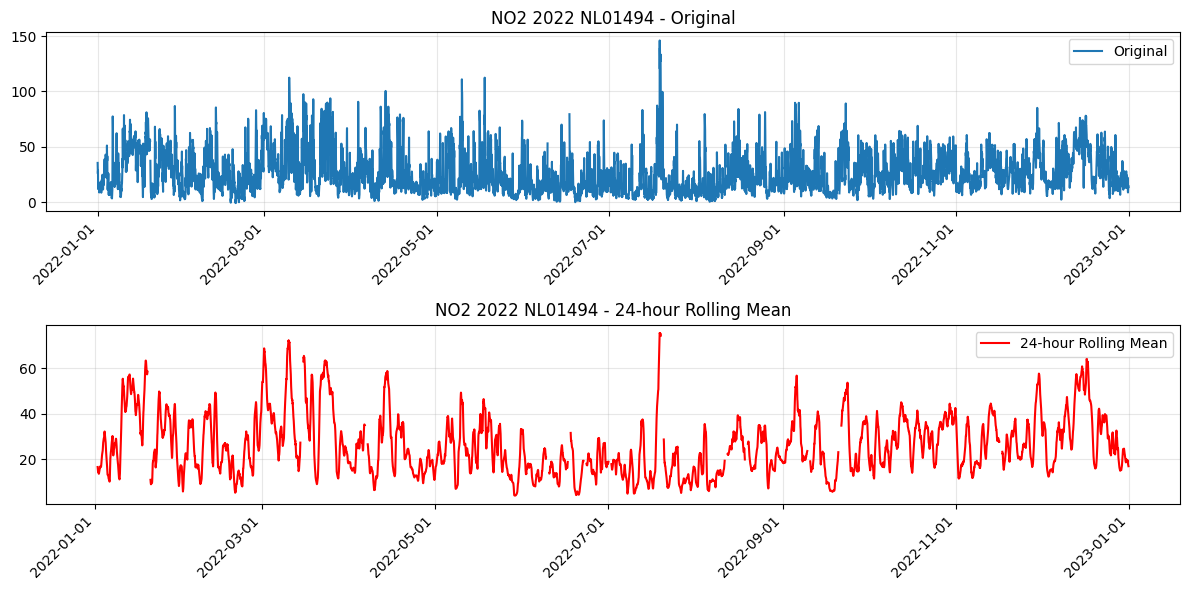

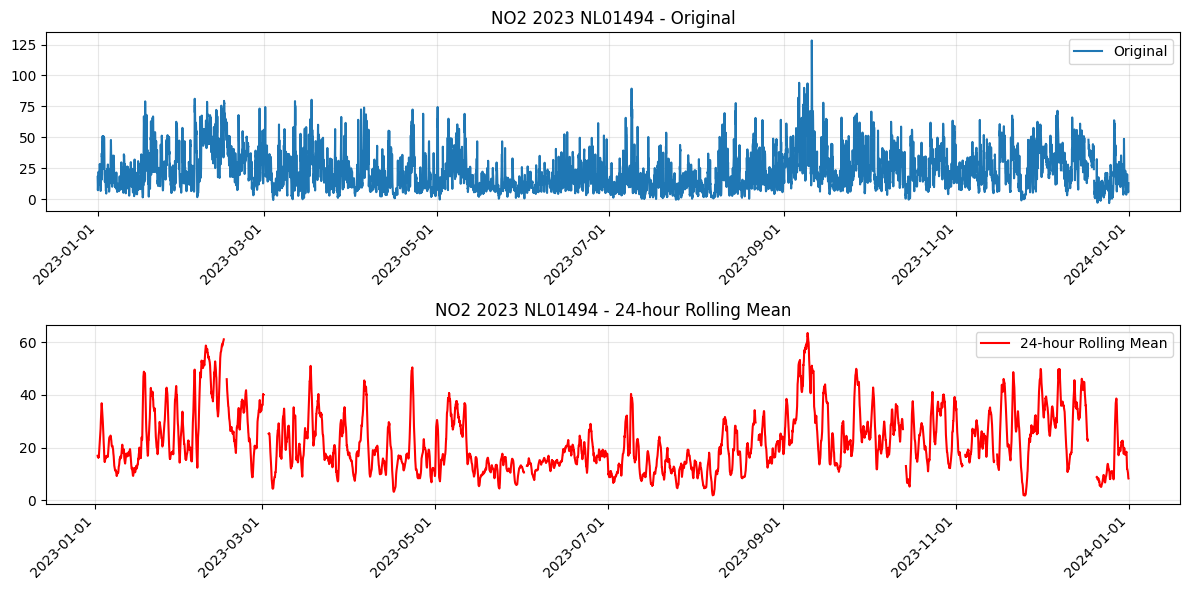

In [12]:
STN = SCHIEDAMA
plot_timeseries(process_contaminants(YEARS, COMPONENT), COMPONENT, STN, YEARS)

## Statenweg Station

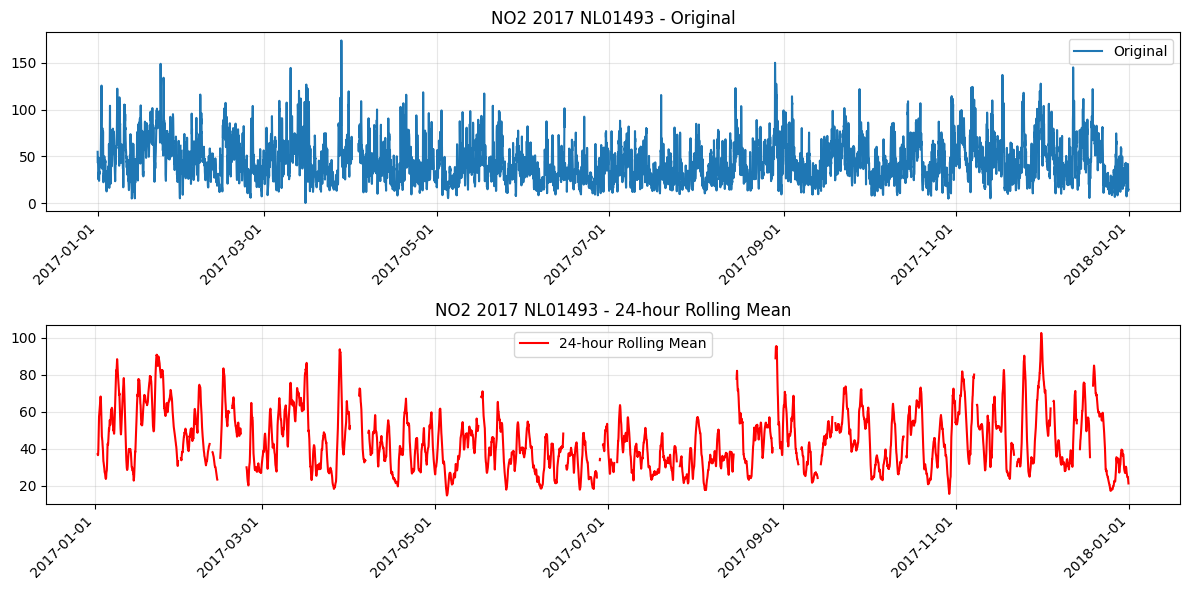

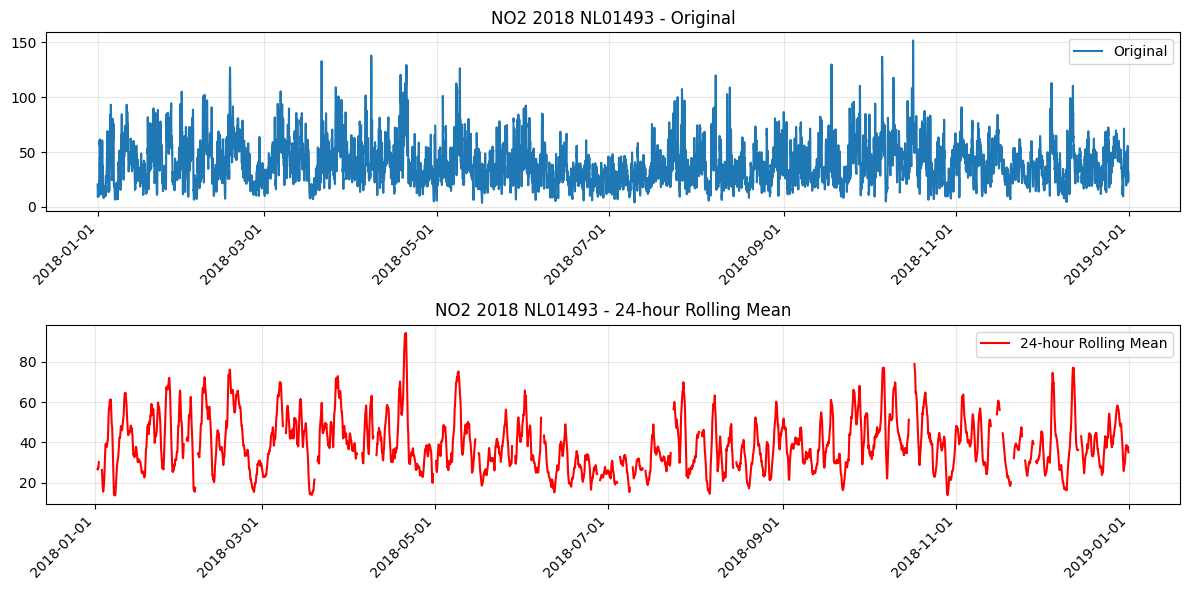

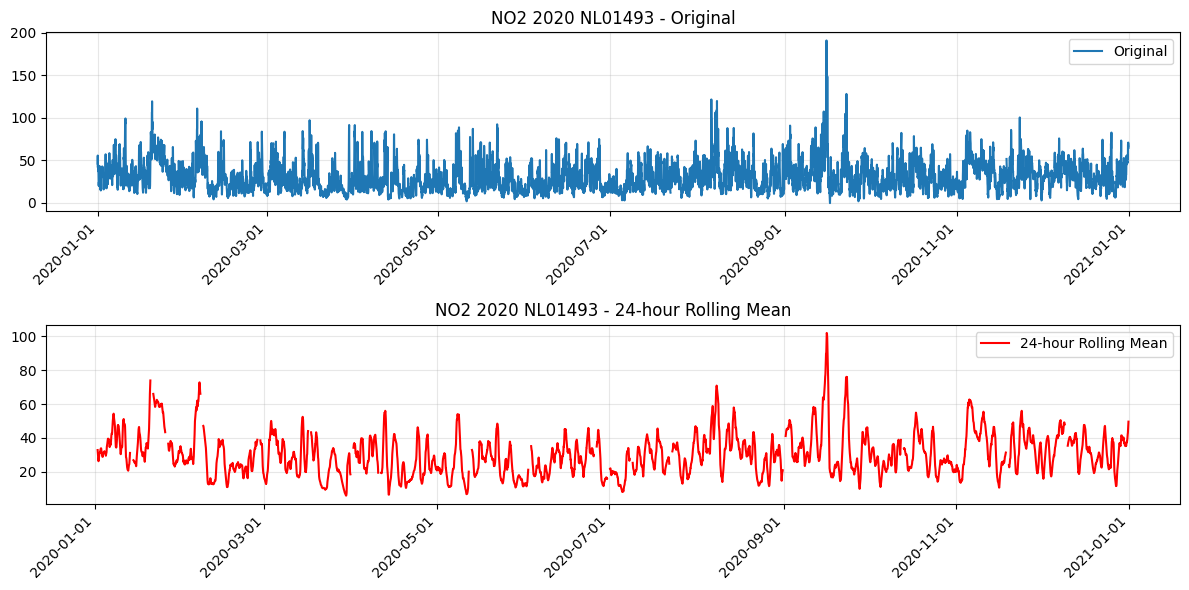

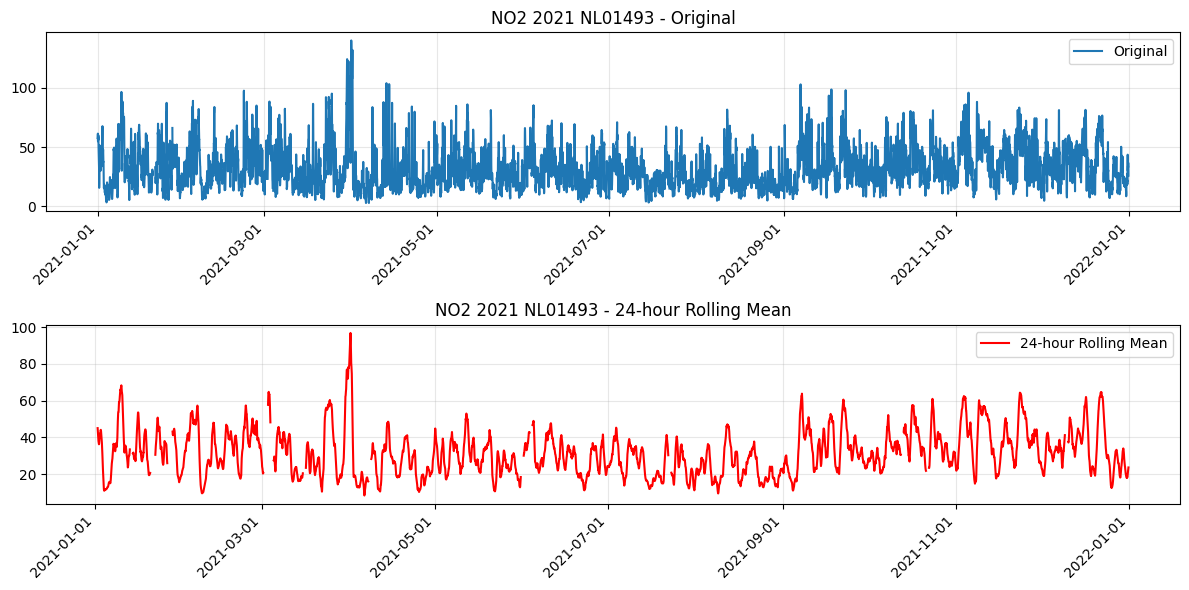

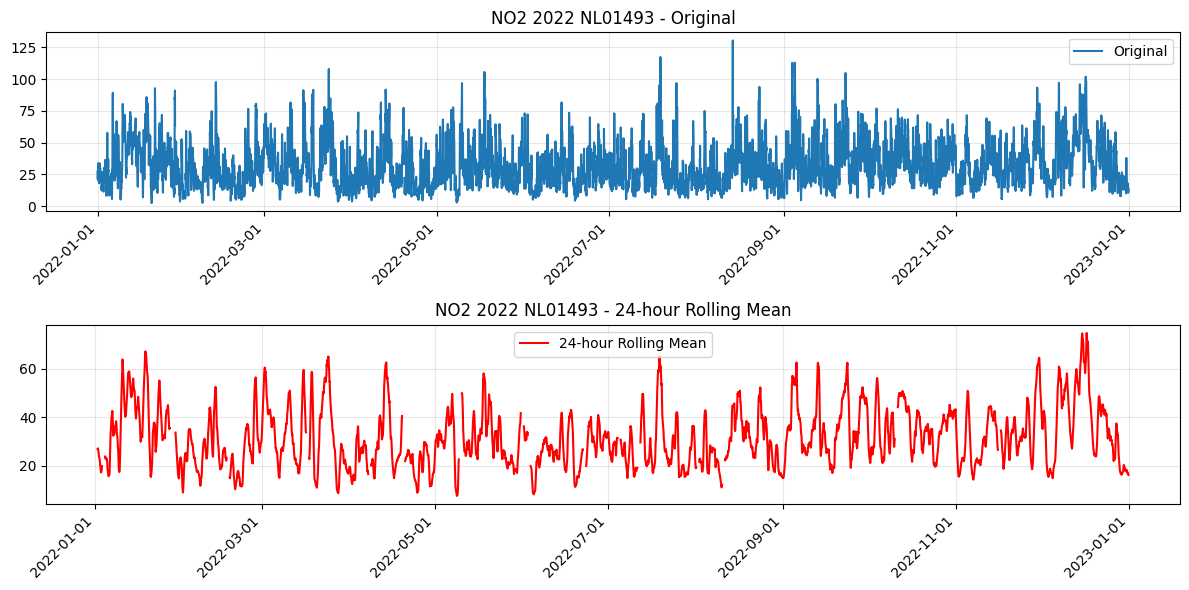

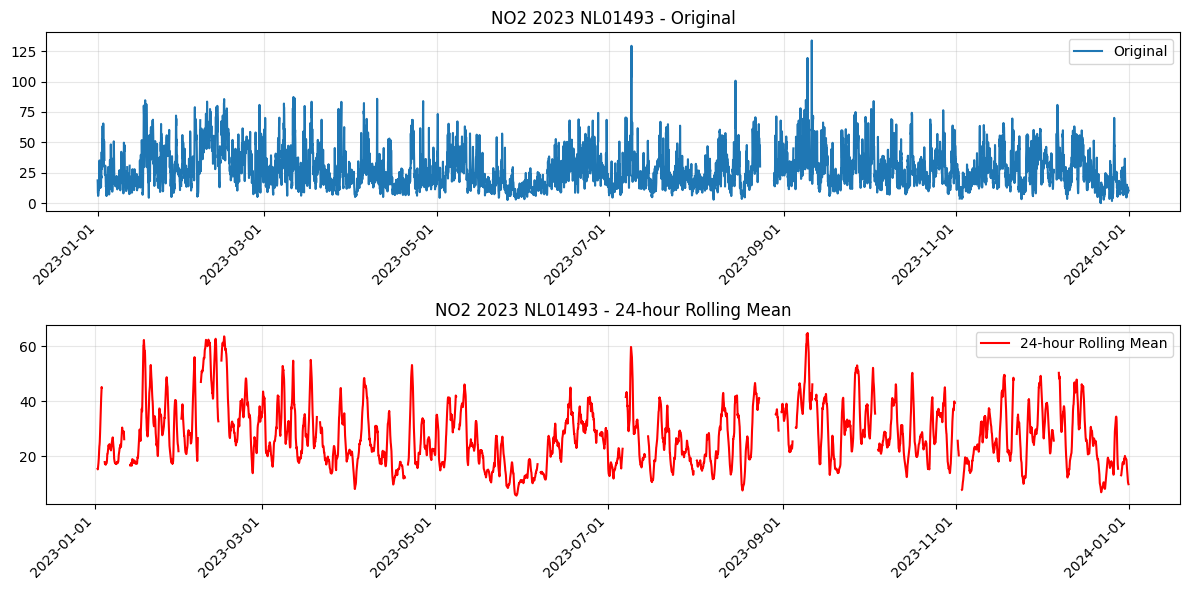

In [13]:
STN = STATENWEG
plot_timeseries(process_contaminants(YEARS, COMPONENT), COMPONENT, STN, YEARS)

## Rotterdam-Hoogvliet


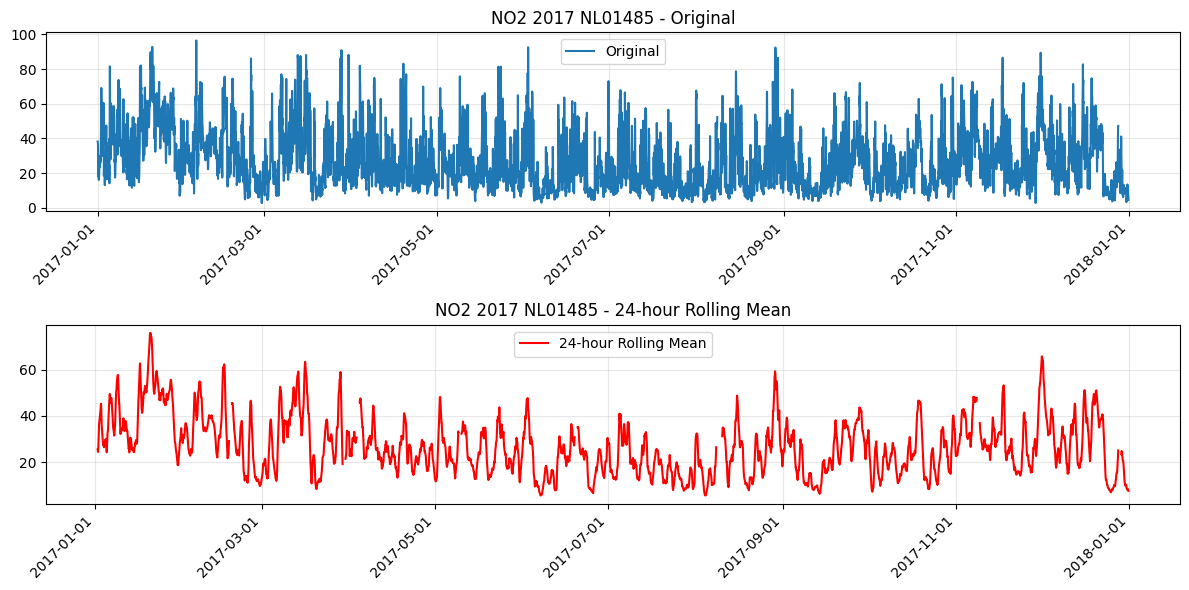

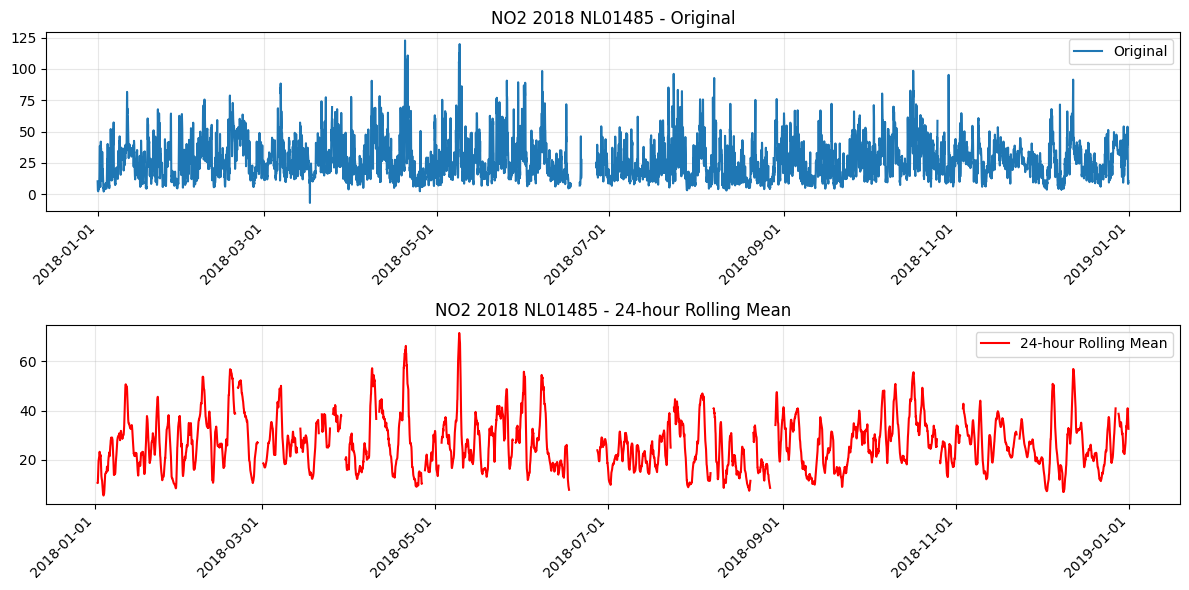

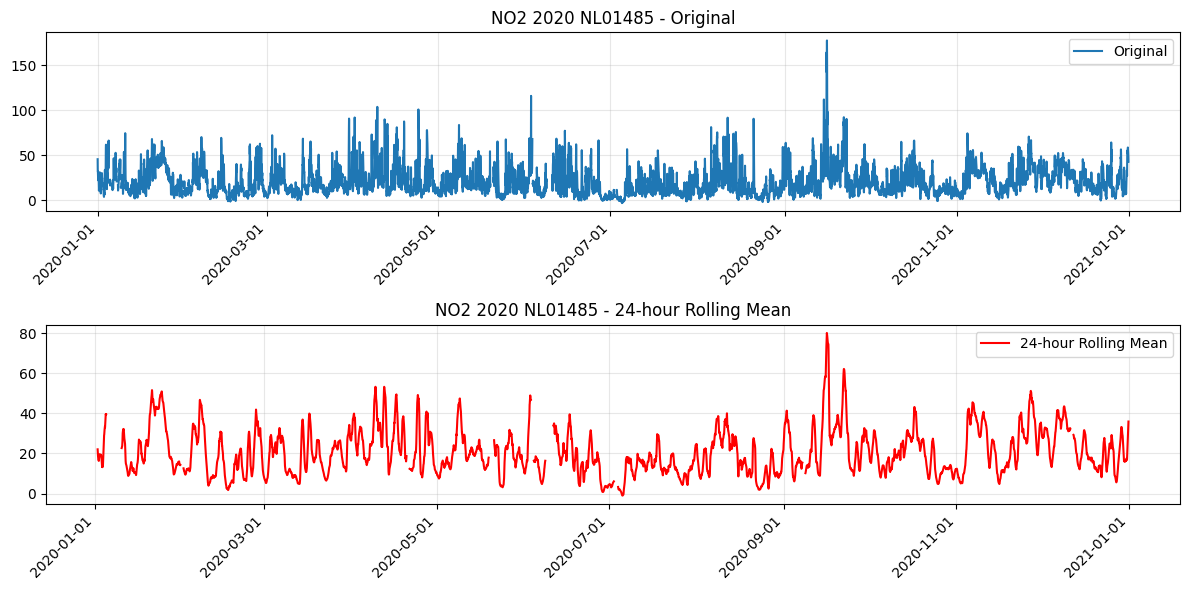

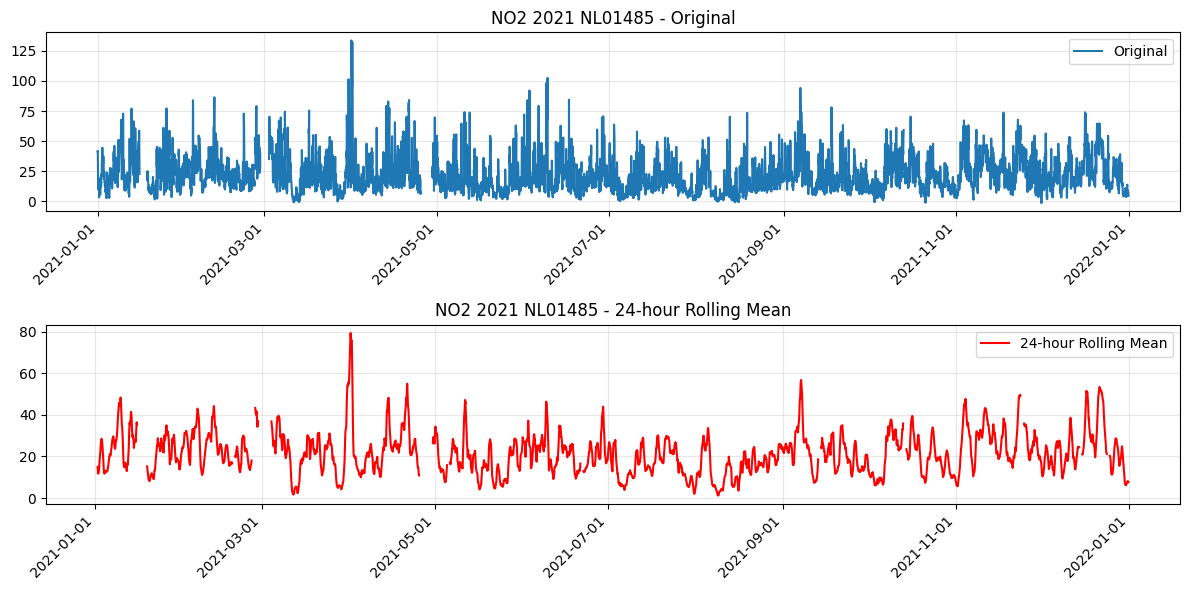

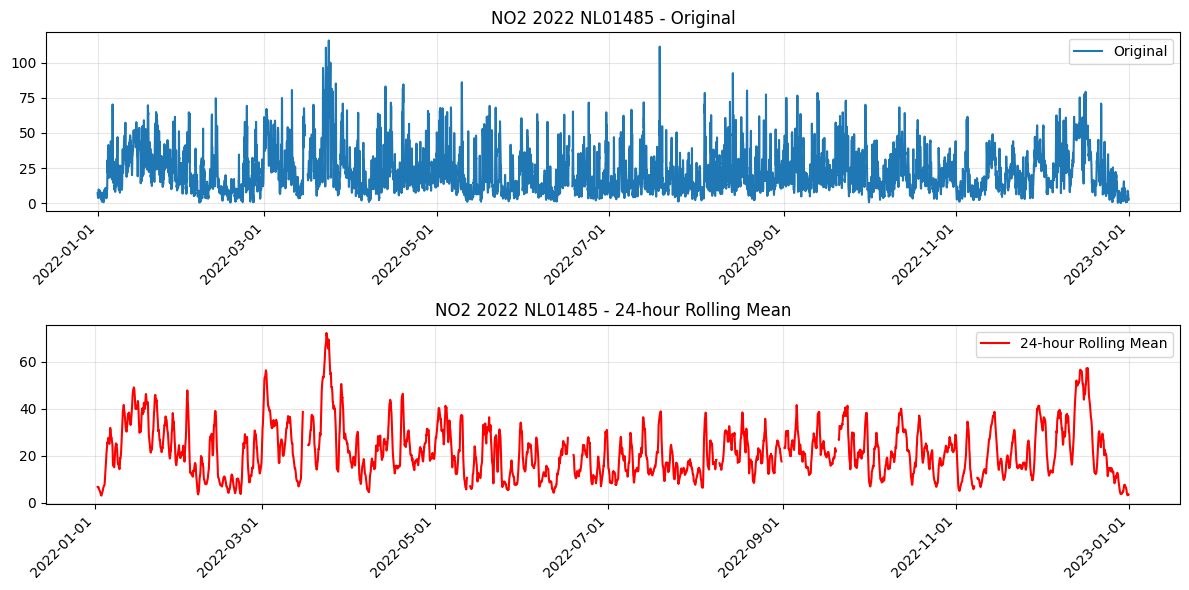

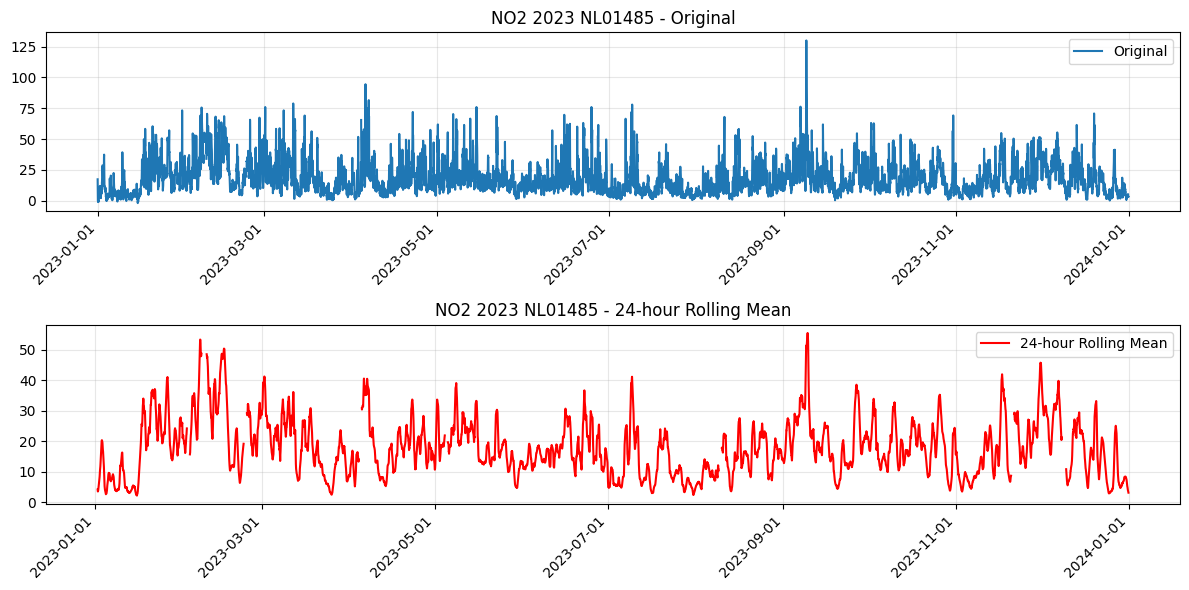

In [14]:
STN = HOOGVLIET
plot_timeseries(process_contaminants(YEARS, COMPONENT), COMPONENT, STN, YEARS)